# Lab06: Binary Classification of Heart Disease of Patients using Deep NN

## Steps: 
### 1. Load the dataset: “heart_data.csv” and explore the features

In [1]:
import csv
import pandas as pd

In [3]:
hea=pd.read_csv('heart_data.csv')

In [4]:
hea.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
hea.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
hea.shape

(303, 14)

In [7]:
hea.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
hea.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
hea.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   2

### 2. Split the dataset for training and testing (test size = 20%)

In [10]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [11]:
X = hea.drop('target', axis = 1) # Input Variables
y = hea.target # Output Variables

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,test_size=0.20)

In [13]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2


In [14]:
X_test.shape

(61, 13)

In [15]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3


In [16]:
X_train.shape

(242, 13)

In [17]:
 y_train.head()

124    1
287    0
77     1
16     1
300    0
Name: target, dtype: int64

In [18]:
y_train.shape

(242,)

In [19]:
 y_test.head() 

84     1
140    1
39     1
79     1
160    1
Name: target, dtype: int64

In [20]:
 y_test.shape

(61,)

### 3. Create a neural network based on the following requirements 
* Input size = No. of features in X_train = 13 
* No. of neurons/units in the Dense layer = 8, with Relu activation function 
* No. of neurons/units in output layer = 1, with sigmoid activation function

In [21]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()
model.add(Dense(8, input_dim=13,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 4. Compile your model with learning rate = 0.001, optimizer as ‘RMSprop’, Mean square error loss and metrics  as ‘accuracy’. 

In [23]:
from tensorflow.keras.optimizers import RMSprop
from keras import metrics

In [24]:
optimizer = RMSprop(0.001)

In [25]:
model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=20, verbose = 1)

Epoch 1/15
13/13 [==============================] - 1s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 2/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 3/15
13/13 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 4/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 5/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 6/15
13/13 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 7/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 8/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 9/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 10/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 11/15
13/13 [

In [26]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.5410 - accuracy: 0.4590


[0.5409836173057556, 0.4590163826942444]

### 5. Print the summary of the model: model.summary()

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### 6. Train the model for 200 epochs and batch size as 10

In [28]:
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=200, batch_size=10,verbose = 1)

Epoch 1/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 11/

In [30]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.5410 - accuracy: 0.4590


[0.5409836173057556, 0.4590163826942444]

### 7. Save the trained model in a variable, such as, history. Also, you can split your training data for validation  such as 20% of training data 

In [31]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 8/100
2

### 8. Evaluate the trained model to predict the probability values for the test data set (ie., xtest and ytest) 

In [32]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.5410 - accuracy: 0.4590


[0.5409836173057556, 0.4590163826942444]

### 9. Print the model accuracy and model loss as below (Use can use the ‘history’ object we have saved)

In [33]:
import matplotlib.pyplot as plt

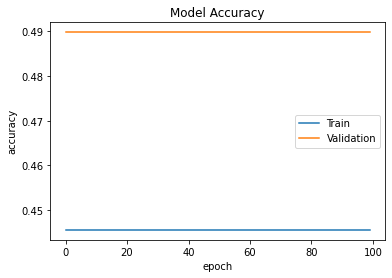

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

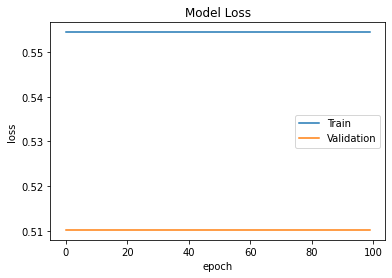

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

### 10. Further experiments 
#### Add a hidden layer with 16 nodes and Relu activation function. Note that now this Dense layer should be the first hidden layer, which is followed by the previous Dense layer with 8 nodes. Now retrain your model, evaluate and print the accuracy and loss chart using matplotlib.

In [36]:
model3 = Sequential()
model3.add(Dense(16, input_dim=13, activation='relu')) # the keras model with 16 nodes
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

In [37]:
model3.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=15, batch_size=20, verbose = 1)

Epoch 1/15
13/13 [==============================] - 1s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 2/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 3/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 4/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 5/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 6/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 7/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 8/15
13/13 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 9/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 10/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 11/15
13/13 [

In [38]:
model3.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.5410 - accuracy: 0.4590


[0.5409836173057556, 0.4590163826942444]

In [39]:
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 8/100
2

In [40]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [41]:
his=history3.history

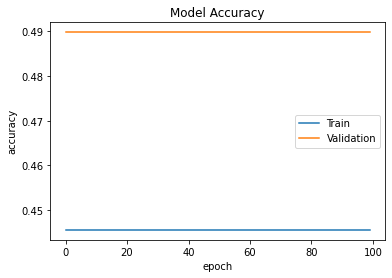

In [42]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

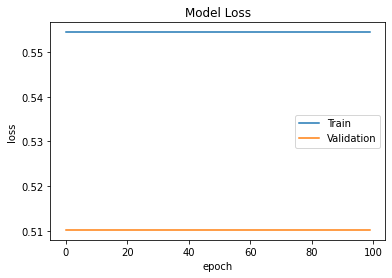

In [43]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Add a hidden layer with 32 nodes and Relu activation function. Note that now this Dense layer should be the first hidden layer. Now retrain your model, evaluate and print the accuracy and loss chart using matplotlib.

In [44]:
model5 = Sequential()   # the keras model with 32 nodes
model5.add(Dense(32, input_dim=13, activation='relu'))
model5.add(Dense(16, activation='relu'))
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1,activation='sigmoid'))

In [45]:
model5.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
model5.fit(X_train, y_train, epochs=15, batch_size=20, verbose = 1)

Epoch 1/15
13/13 [==============================] - 1s 2ms/step - loss: 0.5252 - accuracy: 0.4298
Epoch 2/15
13/13 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.5289
Epoch 3/15
13/13 [==============================] - 0s 2ms/step - loss: 0.3664 - accuracy: 0.5702
Epoch 4/15
13/13 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.6322
Epoch 5/15
13/13 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.6281
Epoch 6/15
13/13 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.5496
Epoch 7/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.6033
Epoch 8/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.5909
Epoch 9/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.6612
Epoch 10/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.6281
Epoch 11/15
13/13 [

In [46]:
model5.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4842 - accuracy: 0.4590


[0.4841545522212982, 0.4590163826942444]

In [47]:
history5 = model5.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 0.2517 - accuracy: 0.6321 - val_loss: 0.4271 - val_accuracy: 0.5102
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2406 - accuracy: 0.6528 - val_loss: 0.3942 - val_accuracy: 0.5306
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2358 - accuracy: 0.6632 - val_loss: 0.3527 - val_accuracy: 0.5306
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.6839 - val_loss: 0.2484 - val_accuracy: 0.6327
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.6684 - val_loss: 0.2601 - val_accuracy: 0.6531
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2549 - accuracy: 0.6269 - val_loss: 0.2295 - val_accuracy: 0.6327
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.6528 - val_loss: 0.4512 - val_accuracy: 0.4898
Epoch 8/100
2

In [48]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [49]:
his1=history5.history

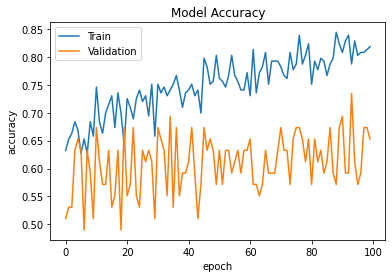

In [50]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

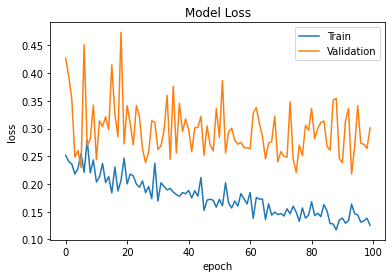

In [51]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Now, increase the nodes 64, 32, 16 for the three hidden layers. Now retrain your model, evaluate and print the accuracy and loss chart using matplotlib.

In [52]:
model6 = Sequential()   # the keras model with 64 nodes
model6.add(Dense(64, input_dim=13, activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(16, activation='relu'))
model6.add(Dense(8, activation='relu'))
model6.add(Dense(1,activation='sigmoid'))

In [53]:
model6.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
model6.fit(X_train, y_train, epochs=15, batch_size=20, verbose = 1)

Epoch 1/15
13/13 [==============================] - 1s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 2/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 3/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 4/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 5/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 6/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 7/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 8/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 9/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 10/15
13/13 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 11/15
13/13 [

In [54]:
model6.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.4590 - accuracy: 0.5410


[0.4590163826942444, 0.5409836173057556]

In [55]:
history6 = model6.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 8/100
2

In [56]:
model6.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [57]:
his3=history6.history

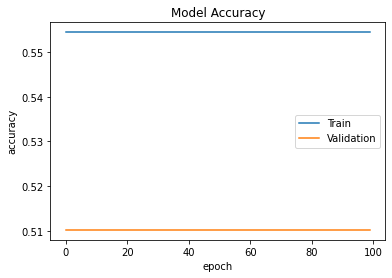

In [58]:
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

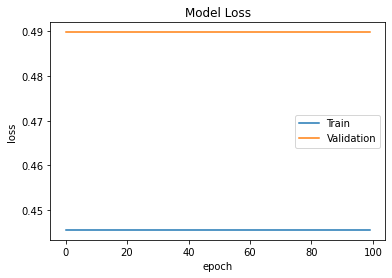

In [59]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Now, increase number of epochs as 150, 200, 300 and batch size as 15 and 20. Now retrain your model, evaluate and print the accuracy and loss chart using matplotlib.

In [60]:
model7 = Sequential()
model7.add(Dense(8, input_dim=13,activation='relu'))
model7.add(Dense(1, activation='sigmoid'))

In [61]:
model7.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy'])
model7.fit(X_train, y_train, epochs=15, batch_size=20, verbose = 1)    

Epoch 1/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 2/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 3/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 4/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 5/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 6/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 7/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 8/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 9/15
13/13 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 10/15
13/13 [==============================] - 0s 2ms/step - loss: 0.5455 - accuracy: 0.4545
Epoch 11/15
13/13 [

In [62]:
model7.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5410 - accuracy: 0.4590


[0.5409836173057556, 0.4590163826942444]

In [63]:
history7 = model7.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=15, verbose=1)  ### Here increase number of epochs as 150 and batch size as 15

Epoch 1/150
13/13 [==============================] - 0s 10ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 2/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 3/150
13/13 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 4/150
13/13 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 5/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 6/150
13/13 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 7/150
13/13 [==============================] - 0s 5ms/step - loss: 0.5544 - accuracy: 0.4456 - val_loss: 0.5102 - val_accuracy: 0.4898
Epoch 8/150


In [64]:
model7.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [65]:
his4=history7.history

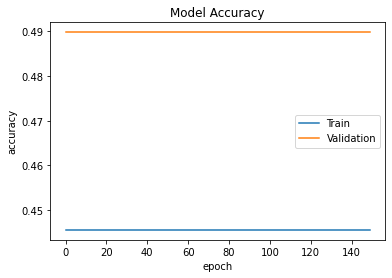

In [66]:
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

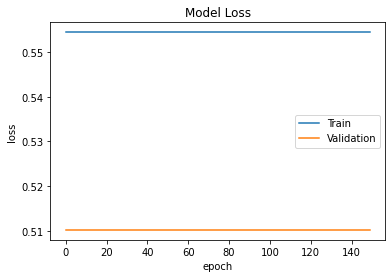

In [67]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [68]:
model8 = Sequential()
model8.add(Dense(16, input_dim=13, activation='relu')) # the keras model with 16 nodes
model8.add(Dense(8, activation='relu'))
model8.add(Dense(1,activation='sigmoid'))

In [69]:
model8.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
model8.fit(X_train, y_train, epochs=15, batch_size=20, verbose = 1)   

Epoch 1/15
13/13 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.5992
Epoch 2/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.6446
Epoch 3/15
13/13 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.5992
Epoch 4/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2745 - accuracy: 0.6612
Epoch 5/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.6446
Epoch 6/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.6074
Epoch 7/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.6446
Epoch 8/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.6736
Epoch 9/15
13/13 [==============================] - 0s 3ms/step - loss: 0.2893 - accuracy: 0.6405
Epoch 10/15
13/13 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.6240
Epoch 11/15
13/13 [

In [70]:
model8.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.3217 - accuracy: 0.5410


[0.3216562867164612, 0.5409836173057556]

In [71]:
history8 = model8.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=20, verbose=1)  ### Here increase number of epochs as 200 and batch size as 20

Epoch 1/200
10/10 [==============================] - 0s 11ms/step - loss: 0.1958 - accuracy: 0.7202 - val_loss: 0.2791 - val_accuracy: 0.5918
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 0.2123 - accuracy: 0.6995 - val_loss: 0.2395 - val_accuracy: 0.6531
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 0.1960 - accuracy: 0.7202 - val_loss: 0.3445 - val_accuracy: 0.5918
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 0.1928 - accuracy: 0.7098 - val_loss: 0.2625 - val_accuracy: 0.5714
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 0.1826 - accuracy: 0.7254 - val_loss: 0.3071 - val_accuracy: 0.6122
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 0.1806 - accuracy: 0.7409 - val_loss: 0.2742 - val_accuracy: 0.6122
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 0.1694 - accuracy: 0.7668 - val_loss: 0.2854 - val_accuracy: 0.6122
Epoch 8/200


In [72]:
model8.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [73]:
his5=history8.history

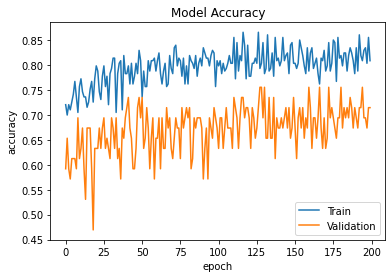

In [74]:
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

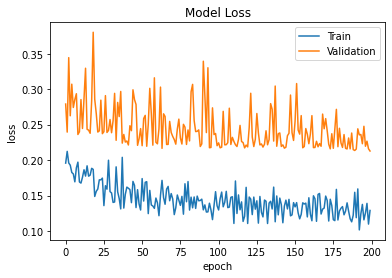

In [75]:
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [76]:
model9 = Sequential()   # the keras model with 32 nodes
model9.add(Dense(32, input_dim=13, activation='relu'))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(8, activation='relu'))
model9.add(Dense(1,activation='sigmoid'))

In [77]:
model9.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
model9.fit(X_train, y_train, epochs=15, batch_size=20, verbose = 1)

Epoch 1/15
13/13 [==============================] - 1s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 2/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 3/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 4/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 5/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 6/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 7/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 8/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 9/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 10/15
13/13 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.5455
Epoch 11/15
13/13 [

In [78]:
model9.evaluate(X_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4590 - accuracy: 0.5410


[0.4590163826942444, 0.5409836173057556]

In [79]:
history9 = model9.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=15, verbose=1)  ### Here increase number of epochs as 300 and batch size as 15

Epoch 1/300
13/13 [==============================] - 0s 8ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 2/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 6/300
13/13 [==============================] - 0s 5ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.5544 - val_loss: 0.4898 - val_accuracy: 0.5102
Epoch 8/300
1

In [80]:
model9.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_20 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [81]:
his6=history9.history

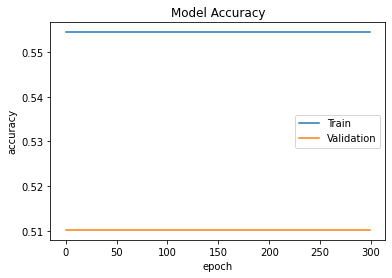

In [82]:
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

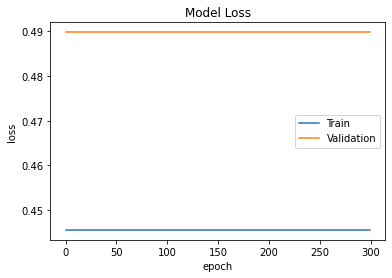

In [83]:
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Now use binary_crossentropy loss function instead of mean square error loss function. Now, compare the accuracy ad loss function values. Draw a bar chart and compare the performance.

In [84]:
model10 = Sequential()   # the keras model with 64 nodes
model10.add(Dense(64, input_dim=13, activation='relu'))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(16, activation='relu'))
model10.add(Dense(8, activation='relu'))
model10.add(Dense(1,activation='sigmoid'))

In [85]:
model10.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model10.fit(X_train, y_train, epochs=15, batch_size=20, verbose = 1)

Epoch 1/15
13/13 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5124
Epoch 2/15
13/13 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5455
Epoch 3/15
13/13 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5455
Epoch 4/15
13/13 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5455
Epoch 5/15
13/13 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5455
Epoch 6/15
13/13 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5455
Epoch 7/15
13/13 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5455
Epoch 8/15
13/13 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5455
Epoch 9/15
13/13 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5455
Epoch 10/15
13/13 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5455
Epoch 11/15
13/13 [

In [86]:
model10.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.6913 - accuracy: 0.5410


[0.6913321018218994, 0.5409836173057556]

In [87]:
history10= model10.fit(X_train, y_train, validation_split=0.2, epochs=250, batch_size=30, verbose=1)

Epoch 1/250
7/7 [==============================] - 0s 15ms/step - loss: 0.6906 - accuracy: 0.5544 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 2/250
7/7 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5544 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 3/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6904 - accuracy: 0.5544 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 4/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6903 - accuracy: 0.5544 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 5/250
7/7 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5544 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 6/250
7/7 [==============================] - 0s 7ms/step - loss: 0.6902 - accuracy: 0.5544 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 7/250
7/7 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5544 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 8/250
7/7 [=========

In [88]:
model10.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 9         
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [89]:
his8=history10.history

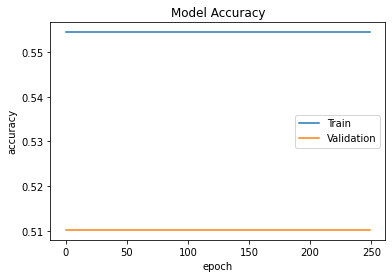

In [90]:
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

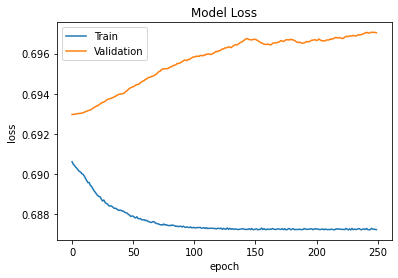

In [91]:
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()